# **TASK 4:- SENTIMENT ANALYSIS**

The task here is to analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

The dataset used here is Amazon Customer Reviews Dataset from Kaggle.

https://www.kaggle.com/datasets/thedevastator/amazon-customer-reviews-with-2013-2019-sentiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING DATASET**

In [2]:
data = pd.read_csv('/content/Amazon Review.csv')
data

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
0,136040,smartTv,Nice one,I liked it,5.0,Positive
1,134236,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5.0,Positive
2,113945,books,Four Stars,"Awesome book at reasonable price, must buy ......",4.0,Positive
3,168076,smartTv,Nice quality,good,5.0,Positive
4,157302,books,Nice book,"The book is fine,not bad,contains nice concept...",3.0,Neutral
...,...,...,...,...,...,...
27192,141778,mobile accessories,Good,Like it,5.0,Positive
27193,165169,mobile accessories,Good in all aspects,"Well built, excellent performance and addition...",5.0,Positive
27194,118555,smartTv,"Budget Friendly, Go For it if you get this for...",Brough this for 10k in the sale if you are loo...,4.0,Positive
27195,170092,mobile,good one. Aggressive pricing.,the phone was given with 1 year warranty and 1...,5.0,Positive


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27197 entries, 0 to 27196
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unique_ID      27197 non-null  int64  
 1   Category       27197 non-null  object 
 2   Review_Header  27195 non-null  object 
 3   Review_text    27186 non-null  object 
 4   Rating         27196 non-null  float64
 5   Own_Rating     27196 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [4]:
data.tail(10)

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
27187,141418,mobile,GOOD,LIKE AND BEST PHONE,5.0,Positive
27188,127915,books,Oft repeated things !,"Good book.... but, this has been written in nu...",4.0,Positive
27189,127070,mobile,Value for money,Good,5.0,Positive
27190,134448,refrigerator,Really awesome stuff.,I brought this for 22990 after instant cash ba...,5.0,Positive
27191,164169,mobile accessories,Supar phone,Very nice phone,4.0,Positive
27192,141778,mobile accessories,Good,Like it,5.0,Positive
27193,165169,mobile accessories,Good in all aspects,"Well built, excellent performance and addition...",5.0,Positive
27194,118555,smartTv,"Budget Friendly, Go For it if you get this for...",Brough this for 10k in the sale if you are loo...,4.0,Positive
27195,170092,mobile,good one. Aggressive pricing.,the phone was given with 1 year warranty and 1...,5.0,Positive
27196,143292,bo,NaN,NaN,NaN,NaN


In [5]:
#Drop the rows having a particular value as NaN
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27186 entries, 0 to 27195
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unique_ID      27186 non-null  int64  
 1   Category       27186 non-null  object 
 2   Review_Header  27186 non-null  object 
 3   Review_text    27186 non-null  object 
 4   Rating         27186 non-null  float64
 5   Own_Rating     27186 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
data.describe(include='all')

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
count,27186.000000,27186,27186,27186,27186.000000,27186
unique,NaN,5,16406,22650,NaN,3
top,NaN,mobile,Good,Good,NaN,Positive
freq,NaN,10188,1423,1037,NaN,21177
mean,140531.740271,NaN,NaN,NaN,4.079563,NaN
std,17594.619721,NaN,NaN,NaN,1.338565,NaN
min,110001.000000,NaN,NaN,NaN,1.000000,NaN
25%,125322.250000,NaN,NaN,NaN,4.000000,NaN
50%,140641.500000,NaN,NaN,NaN,5.000000,NaN
75%,155773.750000,NaN,NaN,NaN,5.000000,NaN


**SENTIMENT ANALYSIS**

Positive    21177
Negative     4034
Neutral      1975
Name: Own_Rating, dtype: int64


<ipython-input-21-c1f0deec79f0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Own_Rating', data=data, palette = ['pink', 'blue', 'yellow'])


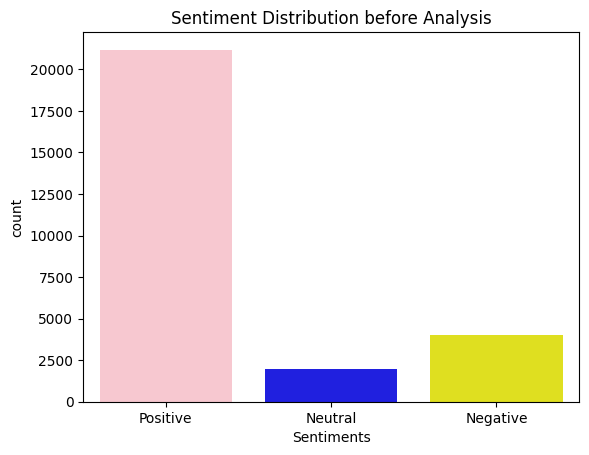

In [21]:
# Analyzing the sentiments given in the dataset
data_sentiment_count = data['Own_Rating'].value_counts()
print(data_sentiment_count)

sns.countplot(x='Own_Rating', data=data, palette = ['pink', 'blue', 'yellow'])
plt.title('Sentiment Distribution before Analysis')
plt.xlabel('Sentiments')
plt.show()

Positive    21086
Neutral      3086
Negative     3014
Name: Sentiment, dtype: int64


<ipython-input-27-b4f04cf8825f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data1, palette = ['green', 'red', 'blue'])


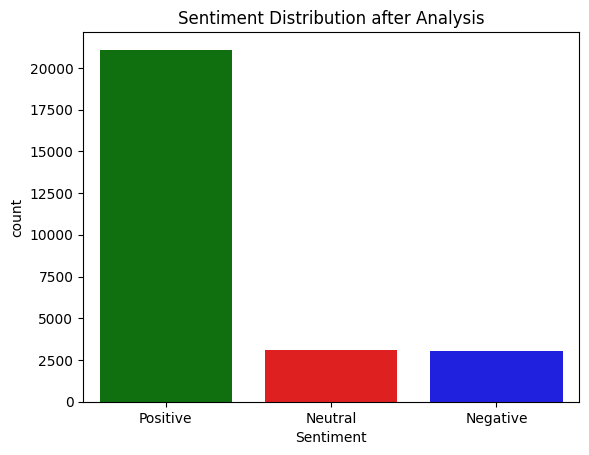

In [27]:
# Now let us do the sentiment analysis using TextBlob and classify sentiments

from textblob import TextBlob

#Take the dataset in different variable
data1 = data

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Creating a new column Sentiment to store the sentiments
data1['Sentiment'] = data1['Review_text'].apply(get_sentiment)

# Count the sentiments
sentiment_counts = data1['Sentiment'].value_counts()
print(sentiment_counts)

# Plotting the sentiment distribution
sns.countplot(x='Sentiment', data=data1, palette = ['green', 'red', 'blue'])
plt.title('Sentiment Distribution after Analysis')
plt.xlabel('Sentiment')
plt.show()

In [10]:
# Now let us do the sentiment analysis using NLTK Vader and classify sentiments based on their product category

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Take the dataset in different variable
data2 = data

sid = SentimentIntensityAnalyzer()
data2['Sentiment Score'] = data2['Review_text'].apply(lambda text: sid.polarity_scores(text)['compound'])

# Map sentiment scores to categories
def get_sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data2['Sentiment Category'] = data2['Sentiment Score'].apply(get_sentiment_category)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Positive    20047
Negative     4261
Neutral      2878
Name: Sentiment Category, dtype: int64

Sentiment Category  Negative  Neutral  Positive
Category                                       
books                    115      262      1369
mobile                  1699     1031      7458
mobile accessories      1176      664      4777
refrigerator             259      205      1683
smartTv                 1012      716      4760



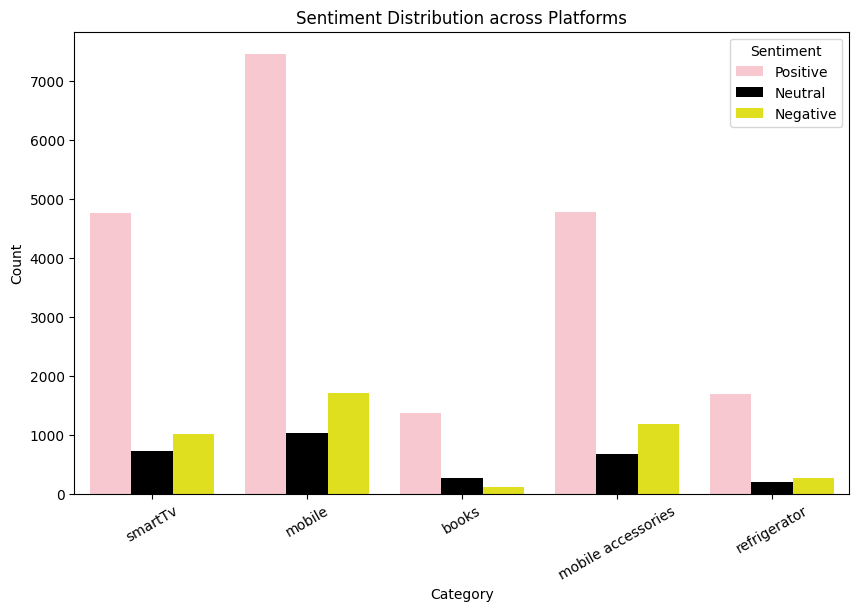

In [25]:
# Count the sentiments
sentiment_counts = data2['Sentiment Category'].value_counts()
print(sentiment_counts)
print()

sentiment_by_category = pd.crosstab(index=data2['Category'], columns=data2['Sentiment Category'])
print(sentiment_by_category)
print()

# Visualize sentiment distribution across categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Sentiment Category', data=data2, palette = ['pink', 'black', 'yellow'])
plt.title('Sentiment Distribution across Platforms')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Sentiment')
plt.show()

**WORD CLOUD**

In [12]:
# Now let us create Word Clouds based on the sentiments. We will use the dataset data2

from wordcloud import WordCloud

# Converting 'Review' column to strings
data['Review_Header'] = data['Review_Header'].astype(str)

positive_reviews = ' '.join(data2[data2['Sentiment Category'] == 'Positive']['Review_Header'])
negative_reviews = ' '.join(data2[data2['Sentiment Category'] == 'Negative']['Review_Header'])
neutral_reviews = ' '.join(data2[data2['Sentiment Category'] == 'Neutral']['Review_Header'])

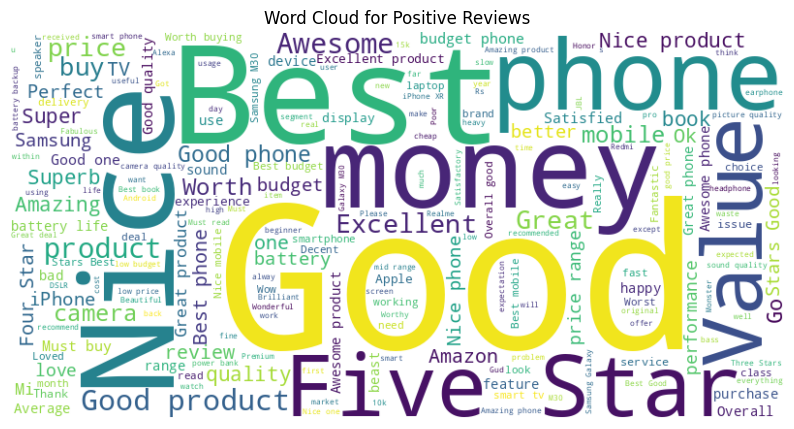

In [13]:
plt.figure(figsize=(10, 8))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

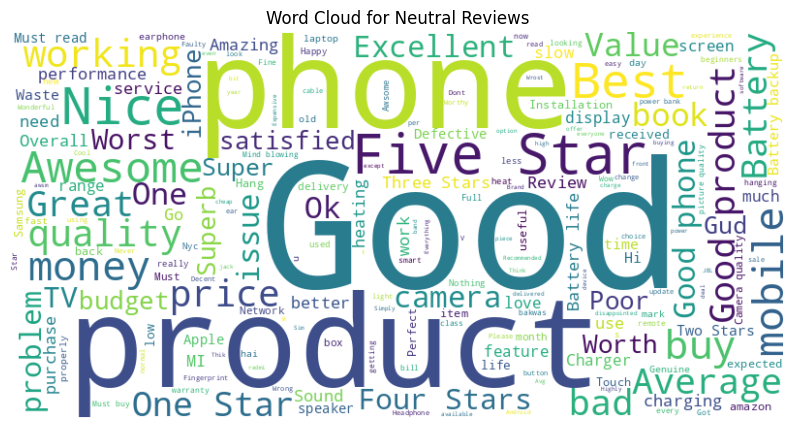

In [14]:
plt.figure(figsize=(10, 8))
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Reviews')
plt.show()

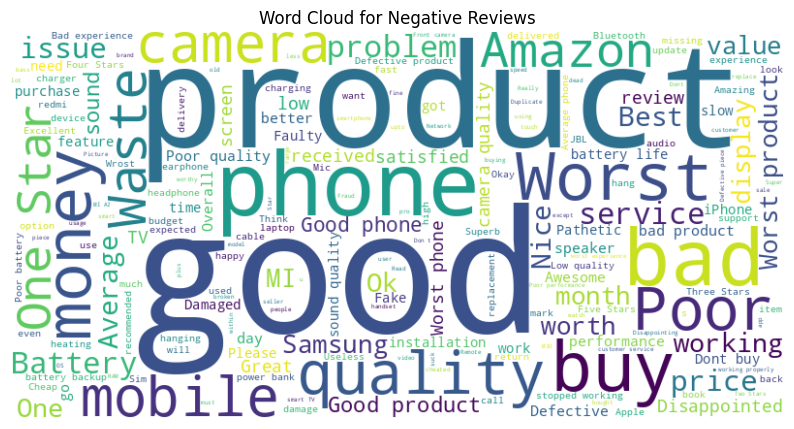

In [15]:
plt.figure(figsize=(10, 8))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

## ***Inference:-***

The Word Cloud gives us a gist of trending keywords according to the respective sentiment.

ADDITIONAL ANALYSIS

<ipython-input-16-b16d117b189e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts, y=words, palette='inferno')


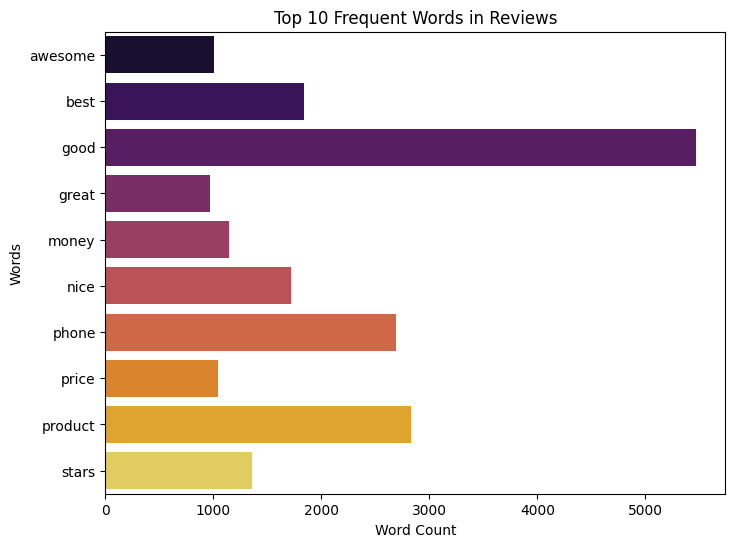

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_frequency = vectorizer.fit_transform(data2['Review_Header'])
words = vectorizer.get_feature_names_out()
word_counts = word_frequency.sum(axis=0).A1

plt.figure(figsize=(8, 6))
sns.barplot(x=word_counts, y=words, palette='inferno')
plt.title('Top 10 Frequent Words in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.show()

<ipython-input-28-9658058e68a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.index, y=top_ratings.values, palette = 'hls')


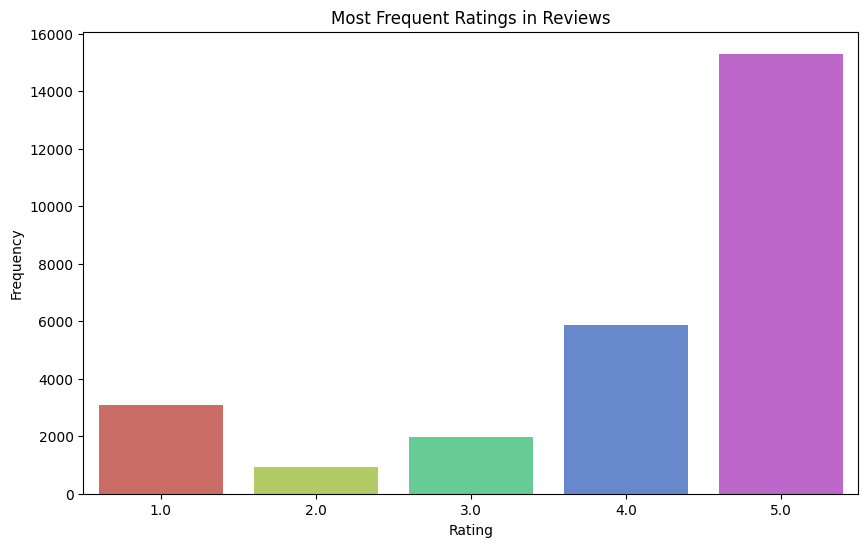

In [28]:
top_ratings = data['Rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette = 'hls')
plt.title('Most Frequent Ratings in Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [18]:
from collections import Counter
# Get the most common words in positive sentiments

positive_df = data2[data2['Sentiment Category'] == 'Positive']

top_positive = Counter([word for sentence in positive_df['Review_text'] for word in sentence.split()])
top_positive = pd.DataFrame(top_positive.most_common(20))
top_positive = top_positive.iloc[1:, :]
top_positive.columns = ['Common_words', 'count']

top_positive.style.background_gradient(cmap='Greens')

,Common_words,count
1,the,14311
2,and,12482
3,to,9121
4,for,8305
5,a,8170
6,I,7465
7,this,6960
8,in,6838
9,it,6610
10,good,6571


In [19]:
# Get the most common words in negative sentiments

negative_df = data2[data2['Sentiment Category'] == 'Negative']

top_negative = Counter([word for sentence in negative_df['Review_text'] for word in sentence.split()])
top_negative = pd.DataFrame(top_negative.most_common(20))
top_negative = top_negative.iloc[1:, :]
top_negative.columns = ['Common_words', 'count']

top_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,the,2952
2,not,2306
3,and,2264
4,to,2151
5,I,1890
6,it,1458
7,this,1455
8,of,1445
9,a,1437
10,in,1314


In [20]:
# Get the most common words in negative sentiments

neutral_df = data2[data2['Sentiment Category'] == 'Neutral']

top_neutral = Counter([word for sentence in neutral_df['Review_text'] for word in sentence.split()])
top_neutral = pd.DataFrame(top_neutral.most_common(20))
top_neutral = top_neutral.iloc[1:, :]
top_neutral.columns = ['Common_words', 'count']

top_neutral.style.background_gradient(cmap='Blues')

,Common_words,count
1,not,517
2,the,502
3,to,418
4,and,400
5,for,325
6,it,303
7,I,282
8,in,271
9,a,262
10,of,259


# ***INFERENCE:-***

From the analysis, it can be concluded that majority of the reviews are positive and the customers are pleased with their purchase of product and they've rated it very highly. There are also reviews which are critical and have to be addressed by the company so that it can improve and grow.